
Training model with hidden layer activation: sigmoid


C:\Users\Anush Bhandary\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 - 2s - 5ms/step - accuracy: 0.8105 - loss: 0.8141 - val_accuracy: 0.9090 - val_loss: 0.3305
Epoch 2/5
469/469 - 2s - 4ms/step - accuracy: 0.9221 - loss: 0.2781 - val_accuracy: 0.9328 - val_loss: 0.2306
Epoch 3/5
469/469 - 1s - 3ms/step - accuracy: 0.9406 - loss: 0.2066 - val_accuracy: 0.9457 - val_loss: 0.1826
Epoch 4/5
469/469 - 1s - 3ms/step - accuracy: 0.9517 - loss: 0.1658 - val_accuracy: 0.9548 - val_loss: 0.1539
Epoch 5/5
469/469 - 2s - 3ms/step - accuracy: 0.9608 - loss: 0.1359 - val_accuracy: 0.9601 - val_loss: 0.1312

Training model with hidden layer activation: tanh
Epoch 1/5
469/469 - 3s - 5ms/step - accuracy: 0.9022 - loss: 0.3495 - val_accuracy: 0.9408 - val_loss: 0.1995
Epoch 2/5
469/469 - 1s - 3ms/step - accuracy: 0.9512 - loss: 0.1649 - val_accuracy: 0.9562 - val_loss: 0.1429
Epoch 3/5
469/469 - 2s - 3ms/step - accuracy: 0.9656 - loss: 0.1155 - val_accuracy: 0.9653 - val_loss: 0.1137
Epoch 4/5
469/469 - 1s - 3ms/step - accuracy: 0.9743 - loss: 0.0882 -

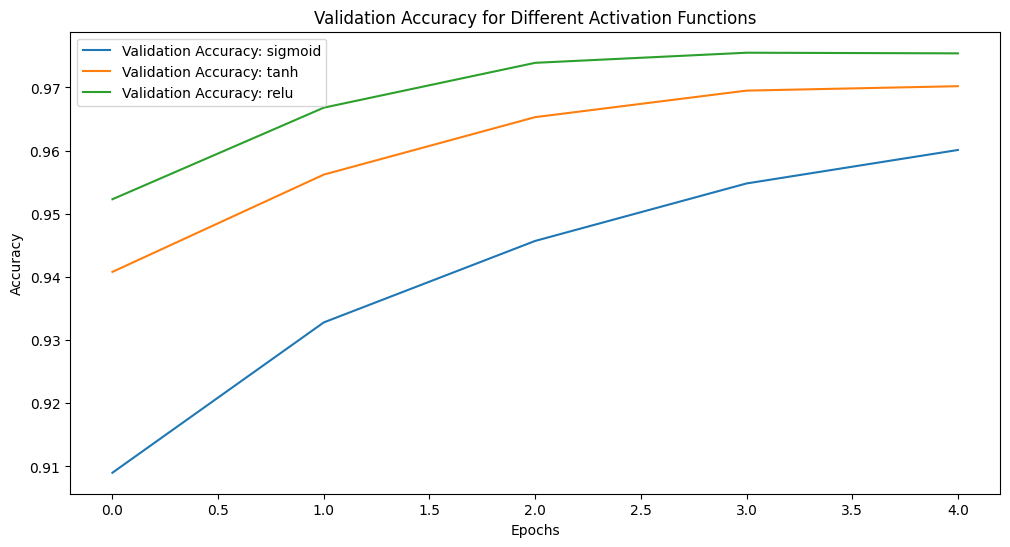

In [2]:
# Lab program 1
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits 0-9)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data 
X_train = X_train.reshape(X_train.shape[0], 28 * 28).astype('float32') / 255  # Flattening and normalization
X_test = X_test.reshape(X_test.shape[0], 28 * 28).astype('float32') / 255

# One-hot encoding of the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the neural network model
def build_model(activation_hidden, activation_output):
    model = Sequential()
    
    # Input layer and first hidden layer
    model.add(Dense(128, input_shape=(28*28,)))  # 128 neurons in the hidden layer
    model.add(Activation(activation_hidden))  # Applying the chosen activation function
    
    # Second hidden layer
    model.add(Dense(64))  # 64 neurons in second hidden layer
    model.add(Activation(activation_hidden))
    
    # Output layer
    model.add(Dense(10))  # 10 output neurons (since we have 10 classes, digits 0-9)
    model.add(Activation(activation_output))  # Activation function for output (softmax for classification)
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# List of activation functions to use for the hidden layers
activation_functions_hidden = ['sigmoid', 'tanh', 'relu']

# Output layer activation is softmax for all cases since it's a classification task
activation_output = 'softmax'

# Dictionary to store training histories for each activation function
history_dict = {}

# Train and evaluate models with different activation functions for hidden layers
for activation_hidden in activation_functions_hidden:
    print(f"\nTraining model with hidden layer activation: {activation_hidden}")
    
    # Build the model
    model = build_model(activation_hidden, activation_output)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=2)
    
    # Store the training history for plotting later
    history_dict[activation_hidden] = history

# Plotting the training and validation accuracy for comparison
plt.figure(figsize=(12, 6))
for activation_hidden in activation_functions_hidden:
    plt.plot(history_dict[activation_hidden].history['val_accuracy'], label=f'Validation Accuracy: {activation_hidden}')
    
plt.title('Validation Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()